<a href="https://colab.research.google.com/github/DManiscalco/MMA-Matchups/blob/main/ADCC_Subs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADCC: What kind of subs are best over time for different weight classes and genders?

In [1]:
%%capture
!pip install kagglehub --upgrade

In [2]:
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Download the dataset from kaggle
path = kagglehub.dataset_download("bjagrelli/adcc-historical-dataset")

# Use $ to keep python variable in the terminal command
!ls $path  # make sure there are files in the path as we expect
!cp -r $path/* /content/  # move to /content folder

adcc_historical_data.csv


In [4]:
# Read CSV file to a pandas df
data_csv = pd.read_csv('/content/adcc_historical_data.csv', delimiter=';')

In [5]:
# Drop all rows that are not subs and then drop any rows with NaN as a sub
submission_df = data_csv[data_csv['win_type'] == 'SUBMISSION']
submission_df = submission_df.dropna(subset=['submission'])

# Note: Heel hooks, inside heel hooks, and outside heel hooks are all listed - combine them
submission_df['submission'] = submission_df['submission'].replace({'Inside heel hook': 'Heel hook', 'Outside heel hook': 'Heel hook'})
submission_df.head()

,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,adv_pen,weight_class,sex,stage,year
1,35049,7507,Nicholas Meregali,9554,Henrique Cardoso,SUBMISSION,Kimura,-1,-1,NaN,99KG,M,R1,2022
31,35064,9559,Rida Haisam,224,Roberto Abreu,SUBMISSION,Armbar,-1,-1,NaN,+99KG,M,R1,2022
40,35017,10880,Roberto Jimenez,12703,Andy Varela,SUBMISSION,RNC,-1,-1,NaN,77KG,M,R1,2022
42,7919,247,Rodolfo Vieira,6792,Cassio Francis,SUBMISSION,RNC,-1,-1,NaN,99KG,M,4F,2015
48,1200,505,Roger Gracie,562,Eduardo Telles,SUBMISSION,Armbar,-1,-1,NaN,99KG,M,4F,2005


In [ ]:
# Break out total counts of each submission for bar graph
sub_counts = submission_df['submission'].value_counts()

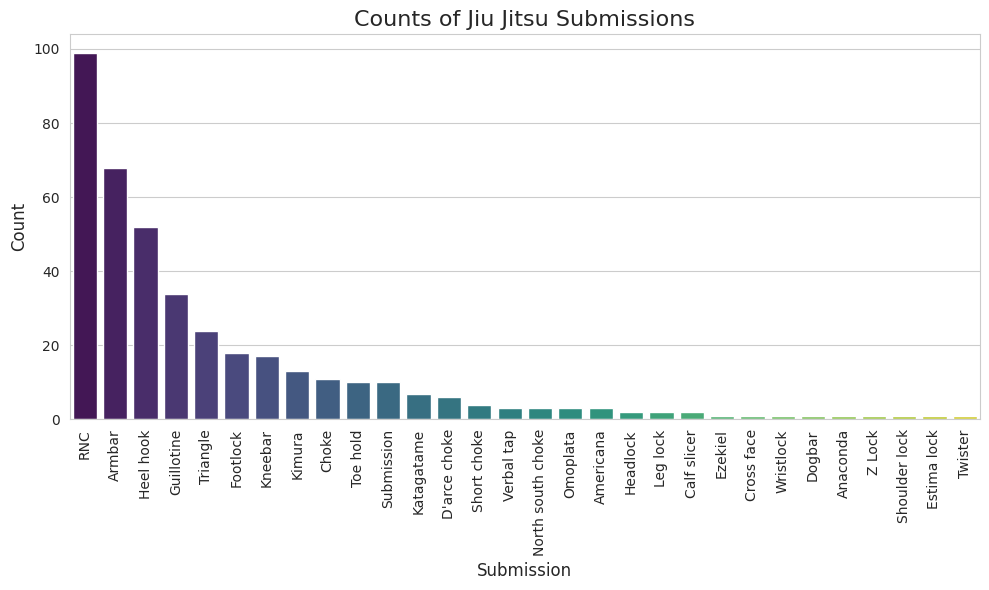

In [ ]:
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='submission', y='count', data=sub_counts.reset_index(),
            palette='viridis',
            hue='submission',  # use `x` variable for hue
            dodge=False,       # prevent stacking (for single-category bars)
            legend=False)      # disable legend since hue matches x

# Add labels and title
plt.title('Counts of Jiu Jitsu Submissions', fontsize=16)
plt.xlabel('Submission', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

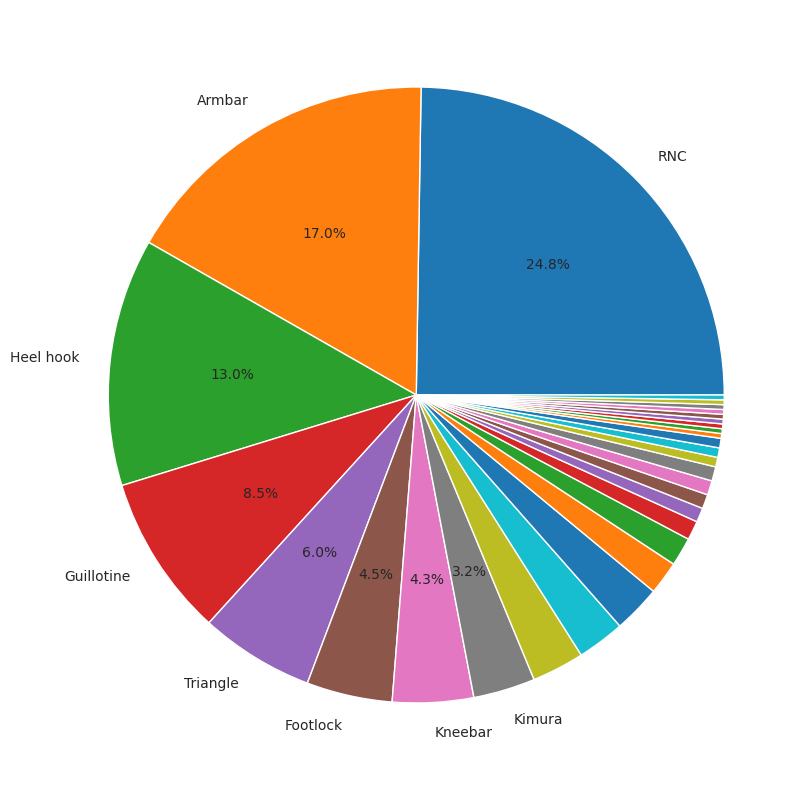

In [ ]:
# Make a pie chart
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')

# Set the threshold for labeling
threshold = 13

# Create a list of labels, replacing those below the threshold with an empty string
labels = [label if count >= threshold else '' for label, count in zip(sub_counts.index, sub_counts)]

plt.pie(sub_counts, labels=labels, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 3 else '')
plt.show()

In [ ]:
# Look at top 1 and 2 subs per year
top_two_subs = submission_df.groupby('year')['submission'].apply(lambda x: x.value_counts().nlargest(2))

# Make df for most frequent and second most frequent subs
first_most_subs = top_two_subs.groupby('year').nth(0).reset_index()
second_most_subs = top_two_subs.groupby('year').nth(1).reset_index()

# Fix the column names
col_names = ['year', 'submission', 'count']

first_most_subs.columns = col_names
second_most_subs.columns = col_names

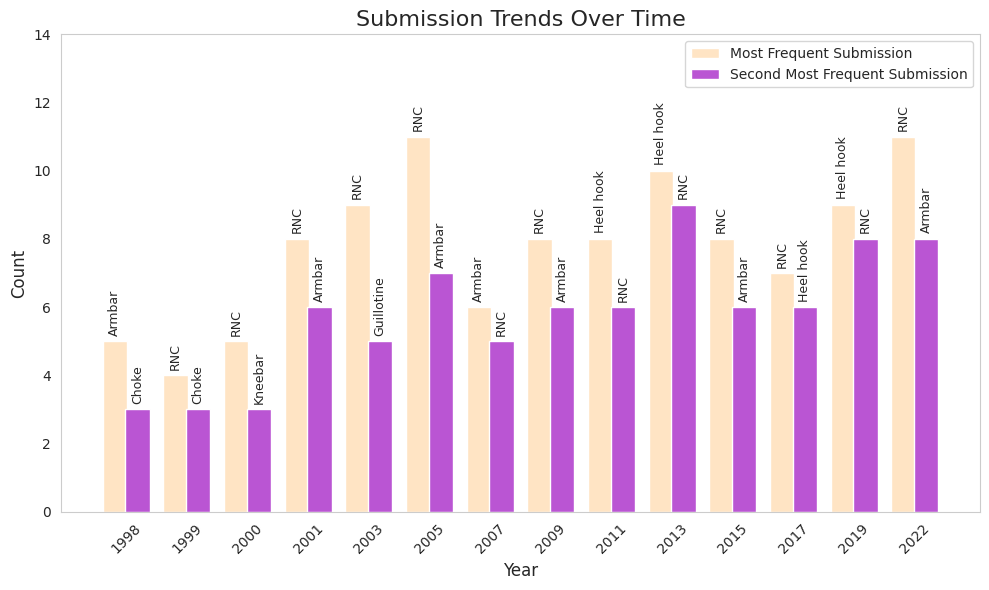

In [ ]:
# Plot the top subs over time
plt.figure(figsize=(10, 6))

bar_width = 0.70
spacing = 2
x_positions = np.arange(len(first_most_subs['year'])) * spacing

# Make the bar charts and add their labels
plt.bar(x_positions - bar_width/2, first_most_subs['count'], label='Most Frequent Submission', color='bisque')
for i, label in enumerate(first_most_subs['submission']):
    plt.text(x_positions[i] - bar_width / 2, first_most_subs['count'][i] + 0.25, label, ha='center', fontsize=9, rotation=90)

plt.bar(x_positions + bar_width/2, second_most_subs['count'], label='Second Most Frequent Submission', color='mediumorchid')
for i, label in enumerate(second_most_subs['submission']):
    plt.text(x_positions[i] + bar_width / 2, second_most_subs['count'][i] + 0.25, label, ha='center', fontsize=9, rotation=90)

# Add labels, title, legend, and grid
plt.title('Submission Trends Over Time', fontsize=16)

plt.xlabel('Year', fontsize=12)
plt.xticks(x_positions, first_most_subs['year'])
plt.xticks(rotation=45)

plt.ylabel('Count', fontsize=12)
plt.ylim(0, first_most_subs.max()['count'] + 3)  # some extra room for the labels

plt.legend(fontsize=10)
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

## Break out by weight class

In [35]:
# Use so we can make all the rows and cols of a pandas df
weight_classes = submission_df['weight_class'].unique()
all_subs = submission_df['submission'].unique()
wgt_class_subs = pd.DataFrame(columns=weight_classes)

# Create a DataFrame with all possible submissions as the index
wgt_class_subs = pd.DataFrame(index=all_subs, columns=weight_classes)

# Go through each weight class and get the value counts for each sub
for weight_class in weight_classes:
  wgt_class_subs[weight_class] = submission_df[submission_df['weight_class'] == weight_class]['submission'].value_counts()

# Some subs don't appear in classes so change any NaN to 0
wgt_class_subs = wgt_class_subs.fillna(0)
wgt_class_subs = wgt_class_subs.astype(int)
wgt_class_subs.head()

,99KG,+99KG,77KG,ABS,88KG,66KG,60KG,+60KG
Kimura,2,2,0,3,3,2,0,1
Armbar,9,15,12,12,9,9,1,1
RNC,12,9,29,16,12,18,3,0
Kneebar,2,6,1,5,1,2,0,0
Estima lock,0,0,0,0,1,0,0,0


In [44]:
# Get the sub that is most common in each weight class and then its value count
max_submissions = wgt_class_subs.idxmax()
max_counts = wgt_class_subs.max()

# Combine the results into df
max_wgt_class_subs = pd.DataFrame({'submission': max_submissions, 'count': max_counts})

,submission,count
99KG,RNC,12
+99KG,Armbar,15
77KG,RNC,29
ABS,Heel hook,20
88KG,RNC,12
66KG,RNC,18
60KG,RNC,3
+60KG,Americana,2


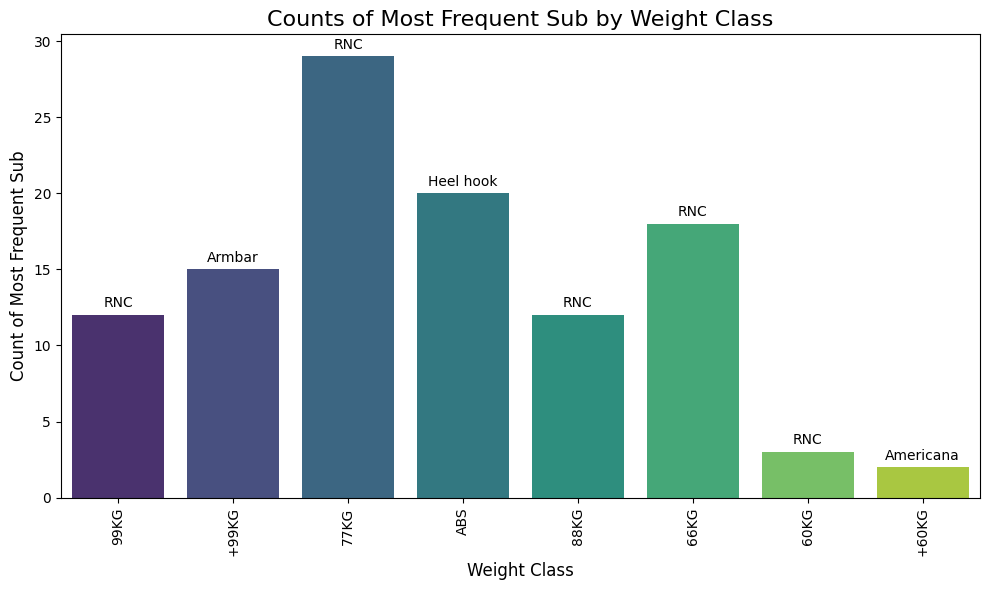

In [62]:
# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=max_wgt_class_subs.index, y='count',
                  data=max_wgt_class_subs,
                  palette='viridis',
                  hue=max_wgt_class_subs.index,  # use `x` variable for hue
                  dodge=False,                   # prevent stacking (for single-category bars)
                  legend=False)

for index, row in max_wgt_class_subs.iterrows():
  plt.text(
    index,                      # X position (center of the bar)
    row['count'] + 0.5,         # Y position (slightly above the bar)
    row['submission'],          # Text to display (value from 'submission' column)
    ha='center', fontsize=10    # Center alignment and font size
  )

# Add labels and title
plt.title('Counts of Most Frequent Sub by Weight Class', fontsize=16)
plt.xlabel('Weight Class', fontsize=12)
plt.ylabel('Count of Most Frequent Sub', fontsize=12)
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

## Break out by gender

In [8]:
# Use so we can make all the rows and cols of a pandas df
gender_classes = submission_df['sex'].unique()
all_subs = submission_df['submission'].unique()
gender_subs = pd.DataFrame(columns=gender_classes)

# Create a DataFrame with all possible submissions as the index
gender_subs = pd.DataFrame(index=all_subs, columns=gender_classes)

# Go through each weight class and get the value counts for each sub
for gender in gender_classes:
  gender_subs[gender] = submission_df[submission_df['sex'] == gender]['submission'].value_counts()

# Some subs don't appear in classes so change any NaN to 0
gender_subs = gender_subs.fillna(0)
gender_subs = gender_subs.astype(int)
gender_subs.head()

,M,F
Kimura,12,1
Armbar,66,2
RNC,96,3
Kneebar,17,0
Estima lock,1,0


In [10]:
# Get the sub that is most common in each weight class and then its value count
max_submissions_gender = gender_subs.idxmax()
max_counts_gender = gender_subs.max()

# Combine the results into df
max_gender_subs = pd.DataFrame({'submission': max_submissions_gender, 'count': max_counts_gender})

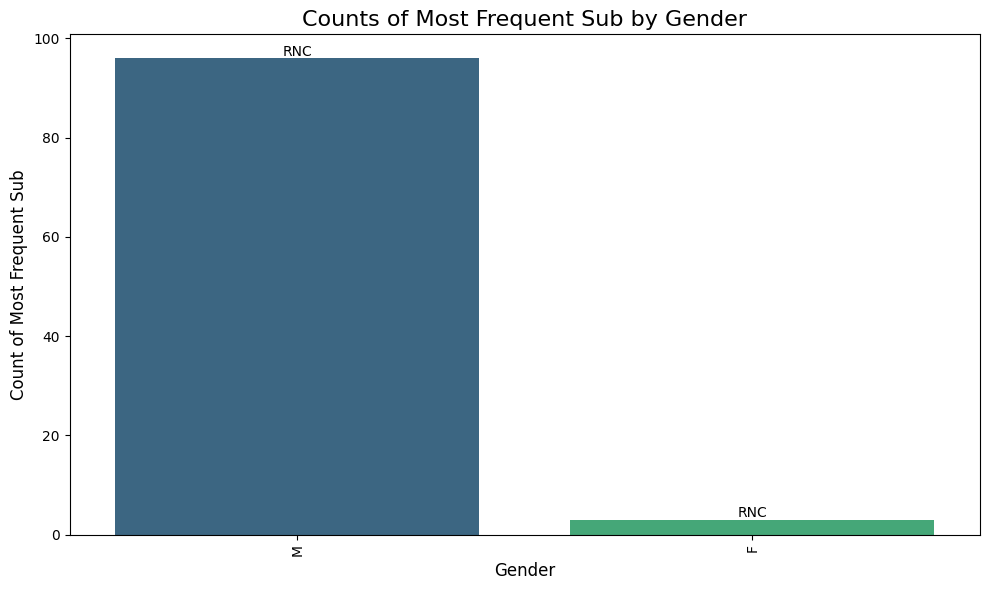

In [11]:
# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=max_gender_subs.index, y='count',
                  data=max_gender_subs,
                  palette='viridis',
                  hue=max_gender_subs.index,  # use `x` variable for hue
                  dodge=False,                   # prevent stacking (for single-category bars)
                  legend=False)

for index, row in max_gender_subs.iterrows():
  plt.text(
    index,                      # X position (center of the bar)
    row['count'] + 0.5,         # Y position (slightly above the bar)
    row['submission'],          # Text to display (value from 'submission' column)
    ha='center', fontsize=10    # Center alignment and font size
  )

# Add labels and title
plt.title('Counts of Most Frequent Sub by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Most Frequent Sub', fontsize=12)
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()